# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [62]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [63]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [64]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"Not Verified | Before my flight, I was forced ..."
1,✅ Trip Verified | British Airways at its bes...
2,✅ Trip Verified | An excellent flight! Despite...
3,✅ Trip Verified | I recently traveled with Bri...
4,✅ Trip Verified | My family and I were booke...


In [65]:
#df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [66]:
#df.reviews = df.reviews.str.replace("✅ Trip Verified |","",regex=False)
df.reviews = df.reviews.str.split("|", expand = True)[1]
df.head()

,reviews
0,"Before my flight, I was forced by the ground ..."
1,British Airways at its best. Outstanding se...
2,An excellent flight! Despite this being a 4.5...
3,I recently traveled with British Airways and ...
4,My family and I were booked to leave London...


In [67]:
import re

def clear(text):
  text = re.sub('[^A-Za-z]+',' ',text)
  return text

df["Cleaned Reviews"] = df.reviews.apply(clear)
df.head()

,reviews,Cleaned Reviews
0,"Before my flight, I was forced by the ground ...",Before my flight I was forced by the ground s...
1,British Airways at its best. Outstanding se...,British Airways at its best Outstanding servi...
2,An excellent flight! Despite this being a 4.5...,An excellent flight Despite this being a hour...
3,I recently traveled with British Airways and ...,I recently traveled with British Airways and ...
4,My family and I were booked to leave London...,My family and I were booked to leave London f...


In [68]:
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [69]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,"Before my flight, I was forced by the ground ...",Before my flight I was forced by the ground s...,"[(flight, n), (forced, v), (ground, n), (staff..."
1,British Airways at its best. Outstanding se...,British Airways at its best Outstanding servi...,"[(British, a), (Airways, n), (best, a), (Outst..."
2,An excellent flight! Despite this being a 4.5...,An excellent flight Despite this being a hour...,"[(excellent, a), (flight, n), (Despite, None),..."
3,I recently traveled with British Airways and ...,I recently traveled with British Airways and ...,"[(recently, r), (traveled, v), (British, n), (..."
4,My family and I were booked to leave London...,My family and I were booked to leave London f...,"[(family, n), (booked, v), (leave, v), (London..."


In [70]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,"Before my flight, I was forced by the ground ...",Before my flight I was forced by the ground s...,"[(flight, n), (forced, v), (ground, n), (staff...",flight force ground staff check new expensiv...
1,British Airways at its best. Outstanding se...,British Airways at its best Outstanding servi...,"[(British, a), (Airways, n), (best, a), (Outst...",British Airways best Outstanding service fli...
2,An excellent flight! Despite this being a 4.5...,An excellent flight Despite this being a hour...,"[(excellent, a), (flight, n), (Despite, None),...",excellent flight Despite hour flight configu...
3,I recently traveled with British Airways and ...,I recently traveled with British Airways and ...,"[(recently, r), (traveled, v), (British, n), (...",recently travel British Airways mixed experi...
4,My family and I were booked to leave London...,My family and I were booked to leave London f...,"[(family, n), (booked, v), (leave, v), (London...",family book leave London Hong Kong August ma...


In [71]:
!pip install vaderSentiment

In [72]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,"Before my flight, I was forced by the ground ...",Before my flight I was forced by the ground s...,"[(flight, n), (forced, v), (ground, n), (staff...",flight force ground staff check new expensiv...,-0.6309,Negative
1,British Airways at its best. Outstanding se...,British Airways at its best Outstanding servi...,"[(British, a), (Airways, n), (best, a), (Outst...",British Airways best Outstanding service fli...,0.9773,Positive
2,An excellent flight! Despite this being a 4.5...,An excellent flight Despite this being a hour...,"[(excellent, a), (flight, n), (Despite, None),...",excellent flight Despite hour flight configu...,0.9940,Positive
3,I recently traveled with British Airways and ...,I recently traveled with British Airways and ...,"[(recently, r), (traveled, v), (British, n), (...",recently travel British Airways mixed experi...,-0.6945,Negative
4,My family and I were booked to leave London...,My family and I were booked to leave London f...,"[(family, n), (booked, v), (leave, v), (London...",family book leave London Hong Kong August ma...,-0.8689,Negative


In [73]:
vader_counts = df['Analysis'].value_counts()
vader_counts

,count
Analysis,
Positive,468
Negative,422
Neutral,110


([<matplotlib.patches.Wedge at 0x7ed25f2f97e0>,
 [Text(0.11039790437095814, 1.0944461168602595, 'Positive'),
  Text(-0.47460171119818745, -0.9923473261553902, 'Negative'),
  Text(1.2701889961293427, -0.45729630887634853, 'Neutral')],
 [Text(0.06021703874779535, 0.5969706091965051, '46.8%'),
  Text(-0.25887366065355677, -0.5412803597211219, '42.2%'),
  Text(0.799748627192549, -0.287927305588812, '11.0%')])

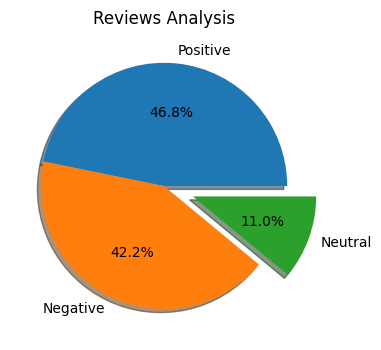

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(4,4))
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index,explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=True)

In [75]:
df.to_csv("BA_reviews.csv")

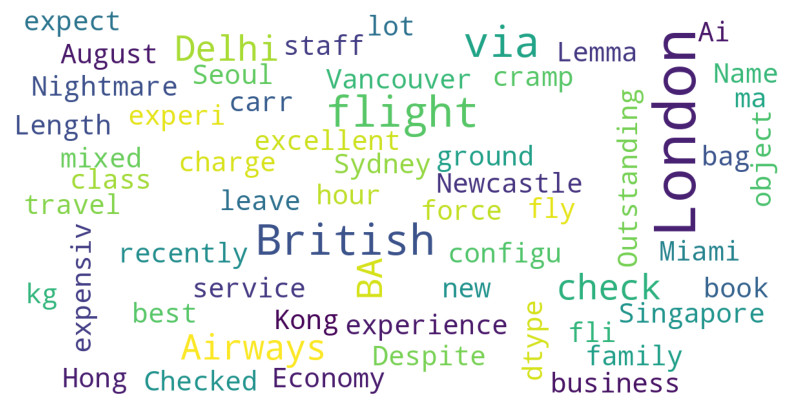

In [76]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=2)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)